In [2]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
sns.set_context('paper')
pd.set_option('display.max_columns', None)

In [474]:
with open("../Data/simu7_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
# df_study = df_study.loc[df_study.session < 100]
# df_test = df_test.loc[df_test.session < 100]

In [475]:
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,serial_pos,list,session
0,110,1083,BED,PLANT,0,0,0
1,1262,1627,SEAL,WRITER,1,0,0
2,738,1198,INMATE,ROBE,2,0,0
3,187,748,BUG,JAM,3,0,0
4,1423,1072,SWORD,PIN,4,0,0
...,...,...,...,...,...,...,...
95995,1507,755,TRIGGER,JELLY,7,15,499
95996,1635,616,ZEBRA,FURNITURE,8,15,499
95997,1313,175,SKATE,BRIEFCASE,9,15,499
95998,981,1438,ORCHESTRA,TAXI,10,15,499


In [476]:
df_test

,test_itemno,test_item,correct_ans,study_pos,test_dir,list,session
0,324,CLIPPERS,823,9,1,0,0
1,1347,SPARROW,1051,8,1,0,0
2,413,CROSS,524,7,0,0,0
3,812,LEOPARD,1323,5,0,0,0
4,110,BED,1083,0,0,0,0
...,...,...,...,...,...,...,...
63995,1297,SHRIMP,1053,3,0,15,499
63996,1205,ROOF,1156,1,0,15,499
63997,1436,TART,488,11,0,15,499
63998,755,JELLY,1507,7,1,15,499


### Run CMR-IA

In [3]:
s_mat = np.load('../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [478]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.5,
    beta_rec = 0.5,
    beta_rec_new = 0.1,
    beta_rec_post = 0.1,
    gamma_fc = 0.4,  # cf - fc Higher, -1 Higher
    gamma_cf = 0.6,
    s_fc = 0.2,
    s_cf = 0.15,
    c_thresh = 0.01,
    c_thresh_ass = 0.01,
    a = 2800,
    b = 2.14,
    m = 0,
    n = 1,
    kappa = 0.08,
    lamb = 0.04,
    eta = 0.02,
    omega = 8,
    phi_s = 1,
    phi_d = 0.6,
    nitems_in_accumulator = 20,
    d_ass = 0.7
)
params

{'beta_enc': 0.5,
 'beta_rec': 0.5,
 'beta_rec_new': 0.1,
 'beta_rec_post': 0.1,
 'beta_distract': None,
 'phi_s': 1,
 'phi_d': 0.6,
 's_cf': 0.15,
 's_fc': 0.2,
 'kappa': 0.08,
 'eta': 0.02,
 'omega': 8,
 'alpha': 4,
 'c_thresh': 0.01,
 'c_thresh_ass': 0.01,
 'd_ass': 0.7,
 'lamb': 0.04,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 20,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 2.14,
 'm': 0,
 'n': 1,
 'c1': 0,
 'gamma_fc': 0.4,
 'gamma_cf': 0.6}

In [479]:
df_simu, f_in = cmr.run_intrusion_cr_multi_sess(params,df_study, df_test ,s_mat)
df_simu

CMR2 Time: 177.04398036003113


,list,session,test_itemno,s_resp,s_rt,csim
0,0,0,324,823.0,1170.0,0.841260
1,0,0,1347,841.0,1630.0,0.687589
2,0,0,413,1051.0,1960.0,0.728226
3,0,0,812,879.0,1860.0,0.704154
4,0,0,110,1323.0,1550.0,0.716899
...,...,...,...,...,...,...
63995,15,499,1297,1261.0,1790.0,0.732678
63996,15,499,1205,1156.0,1400.0,0.862672
63997,15,499,1436,1106.0,2060.0,0.704206
63998,15,499,755,1048.0,2190.0,0.676760


In [480]:
df_simu = df_simu.merge(df_test,on=['session','list','test_itemno'])
df_simu['correct'] = df_simu.s_resp == df_simu.correct_ans
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct
0,0,0,324,823.0,1170.0,0.841260,CLIPPERS,823,9,1,True
1,0,0,1347,841.0,1630.0,0.687589,SPARROW,1051,8,1,False
2,0,0,413,1051.0,1960.0,0.728226,CROSS,524,7,0,False
3,0,0,812,879.0,1860.0,0.704154,LEOPARD,1323,5,0,False
4,0,0,110,1323.0,1550.0,0.716899,BED,1083,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
63995,15,499,1297,1261.0,1790.0,0.732678,SHRIMP,1053,3,0,False
63996,15,499,1205,1156.0,1400.0,0.862672,ROOF,1156,1,0,True
63997,15,499,1436,1106.0,2060.0,0.704206,TART,488,11,0,False
63998,15,499,755,1048.0,2190.0,0.676760,JELLY,1507,7,1,False


In [481]:
sessions = np.unique(df_simu.session)
nlist = len(np.unique(df_simu.list))
resp_study_list = []
resp_study_pos = []
for sess in sessions:
    
    pres_words = df_study.loc[df_study.session == sess, ['study_itemno1','study_itemno2']].to_numpy()
    pres_words = np.reshape(pres_words,(nlist,-1,2))
    responses = df_simu.loc[df_simu.session == sess, 's_resp']

    for r in responses:
        if r == -1:
            r_list = None
            r_pos = None
        else:
            r_list = np.where(pres_words==r)[0].item()
            r_pos = np.where(pres_words==r)[1].item()
        resp_study_list.append(r_list)
        resp_study_pos.append(r_pos)

df_simu['resp_study_list'] = resp_study_list
df_simu['resp_study_pos'] = resp_study_pos
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos
0,0,0,324,823.0,1170.0,0.841260,CLIPPERS,823,9,1,True,0.0,9.0
1,0,0,1347,841.0,1630.0,0.687589,SPARROW,1051,8,1,False,0.0,11.0
2,0,0,413,1051.0,1960.0,0.728226,CROSS,524,7,0,False,0.0,8.0
3,0,0,812,879.0,1860.0,0.704154,LEOPARD,1323,5,0,False,0.0,6.0
4,0,0,110,1323.0,1550.0,0.716899,BED,1083,0,0,False,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,15,499,1297,1261.0,1790.0,0.732678,SHRIMP,1053,3,0,False,15.0,5.0
63996,15,499,1205,1156.0,1400.0,0.862672,ROOF,1156,1,0,True,15.0,1.0
63997,15,499,1436,1106.0,2060.0,0.704206,TART,488,11,0,False,15.0,5.0
63998,15,499,755,1048.0,2190.0,0.676760,JELLY,1507,7,1,False,15.0,4.0


In [482]:
df_simu['list_lag'] = df_simu['resp_study_list'] - df_simu['list']
df_simu['pos_lag'] = df_simu['resp_study_pos'] - df_simu['study_pos']

def which_intrusion(x):
    x_list_lag = x['list_lag']
    x_pos_lag = x['pos_lag']

    if math.isnan(x_list_lag):
        return 'NoResp'
    elif x_list_lag == 0 and x_pos_lag == 0:
        return 'Correct'
    elif x_list_lag != 0:
        return 'PLI'
    elif x_list_lag == 0 and x_pos_lag != 0:
        return 'ILI'
    else:
        return 'Else'

df_simu['intrusion_type'] = df_simu.apply(lambda x:which_intrusion(x),axis=1)
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
0,0,0,324,823.0,1170.0,0.841260,CLIPPERS,823,9,1,True,0.0,9.0,0.0,0.0,Correct
1,0,0,1347,841.0,1630.0,0.687589,SPARROW,1051,8,1,False,0.0,11.0,0.0,3.0,ILI
2,0,0,413,1051.0,1960.0,0.728226,CROSS,524,7,0,False,0.0,8.0,0.0,1.0,ILI
3,0,0,812,879.0,1860.0,0.704154,LEOPARD,1323,5,0,False,0.0,6.0,0.0,1.0,ILI
4,0,0,110,1323.0,1550.0,0.716899,BED,1083,0,0,False,0.0,5.0,0.0,5.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,15,499,1297,1261.0,1790.0,0.732678,SHRIMP,1053,3,0,False,15.0,5.0,0.0,2.0,ILI
63996,15,499,1205,1156.0,1400.0,0.862672,ROOF,1156,1,0,True,15.0,1.0,0.0,0.0,Correct
63997,15,499,1436,1106.0,2060.0,0.704206,TART,488,11,0,False,15.0,5.0,0.0,-6.0,ILI
63998,15,499,755,1048.0,2190.0,0.676760,JELLY,1507,7,1,False,15.0,4.0,0.0,-3.0,ILI


In [483]:
# clean list 1
df_simu = df_simu.query("list > 0")
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,1248.0,1280.0,0.841804,PUMP,1248,10,1,True,1.0,10.0,0.0,0.0,Correct
9,1,0,1540,232.0,1600.0,0.854156,UNIVERSE,232,9,0,True,1.0,9.0,0.0,0.0,Correct
10,1,0,528,1590.0,2400.0,0.835673,EMERALD,1590,8,1,True,1.0,8.0,0.0,0.0,Correct
11,1,0,506,1534.0,2440.0,0.802446,DUNE,1534,11,0,True,1.0,11.0,0.0,0.0,Correct
12,1,0,844,1021.0,1760.0,0.659873,LOOP,396,5,1,False,1.0,7.0,0.0,2.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,15,499,1297,1261.0,1790.0,0.732678,SHRIMP,1053,3,0,False,15.0,5.0,0.0,2.0,ILI
63996,15,499,1205,1156.0,1400.0,0.862672,ROOF,1156,1,0,True,15.0,1.0,0.0,0.0,Correct
63997,15,499,1436,1106.0,2060.0,0.704206,TART,488,11,0,False,15.0,5.0,0.0,-6.0,ILI
63998,15,499,755,1048.0,2190.0,0.676760,JELLY,1507,7,1,False,15.0,4.0,0.0,-3.0,ILI


In [484]:
df_simu.head(12)

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,1248.0,1280.0,0.841804,PUMP,1248,10,1,True,1.0,10.0,0.0,0.0,Correct
9,1,0,1540,232.0,1600.0,0.854156,UNIVERSE,232,9,0,True,1.0,9.0,0.0,0.0,Correct
10,1,0,528,1590.0,2400.0,0.835673,EMERALD,1590,8,1,True,1.0,8.0,0.0,0.0,Correct
11,1,0,506,1534.0,2440.0,0.802446,DUNE,1534,11,0,True,1.0,11.0,0.0,0.0,Correct
12,1,0,844,1021.0,1760.0,0.659873,LOOP,396,5,1,False,1.0,7.0,0.0,2.0,ILI
13,1,0,586,1446.0,1490.0,0.844328,FLY,1446,4,1,True,1.0,4.0,0.0,0.0,Correct
14,1,0,1093,35.0,890.0,0.842255,POCKET,35,2,0,True,1.0,2.0,0.0,0.0,Correct
15,1,0,666,456.0,1650.0,0.833766,GROUND,456,3,0,True,1.0,3.0,0.0,0.0,Correct
16,2,0,173,414.0,1470.0,0.874292,BRIDE,414,10,0,True,2.0,10.0,0.0,0.0,Correct
17,2,0,492,845.0,2280.0,0.836876,DRAGON,845,11,0,True,2.0,11.0,0.0,0.0,Correct


In [485]:
df_simu.groupby("intrusion_type")["list"].count()

intrusion_type
Correct    27362
ILI        29687
NoResp       190
PLI         2761
Name: list, dtype: int64

In [486]:
# correct rate
sum(df_simu.correct)/len(df_simu.correct)

0.45603333333333335

In [487]:
np.array(f_in).shape

(500, 128, 384)

In [488]:
# sessions = df_simu.session.to_numpy()
# for sess in sessions:
#     df_tmp = df_study.loc[df_study.session == sess]
#     tmp1 = df_tmp.study_itemno1.to_numpy()
#     tmp2 = df_tmp.study_itemno2.to_numpy()
#     tmp = np.concatenate((tmp1, tmp2))
#     tmp = np.sort(tmp)
#     testid = np.searchsorted(tmp, df_simu.test_itemno[sess].item())
#     corrid = np.searchsorted(tmp, df_simu.correct_ans[sess].item())
#     df_simu.loc[df_simu.session == sess, 'corr_fin']= f_in[sess][corrid]
#     df_simu.loc[df_simu.session == sess, 'omean_fin'] = np.mean(np.delete(f_in[sess], [testid,corrid]))
#     df_simu.loc[df_simu.session == sess, 'omax_fin'] = np.delete(f_in[sess], [testid,corrid]).max()
# df_simu

In [489]:
# df_fin = df_simu.groupby('lag')['corr_fin','omean_fin','omax_fin'].mean().reset_index()
# df_fin['dif'] = df_fin['corr_fin'] - df_fin['omax_fin']
# df_fin

In [490]:
# sns.lineplot(data=df_fin, x='lag', y='corr_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omean_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omax_fin', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

In [491]:
# sns.lineplot(data=df_fin, x='lag', y='dif', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

### PLOT

In [492]:
df_PLI = df_simu.loc[df_simu.intrusion_type == 'PLI']
PLI_num = df_PLI.shape[0]
df_PLIgp = df_PLI.groupby("list_lag")['test_item'].count().to_frame(name='PLI_cnt').reset_index()
df_PLIgp['list_abs_lag'] = np.abs(df_PLIgp['list_lag'])
df_PLIgp['PLI_prob'] = df_PLIgp['PLI_cnt'] / PLI_num
df_PLIgp

,list_lag,PLI_cnt,list_abs_lag,PLI_prob
0,-15.0,3,15.0,0.001087
1,-14.0,20,14.0,0.007244
2,-13.0,41,13.0,0.014850
3,-12.0,46,12.0,0.016661
4,-11.0,76,11.0,0.027526
5,-10.0,79,10.0,0.028613
6,-9.0,95,9.0,0.034408
7,-8.0,117,8.0,0.042376
8,-7.0,149,7.0,0.053966
9,-6.0,143,6.0,0.051793


In [493]:
df_PLI

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
29,3,0,659,1002.0,2710.0,0.674109,GRAVEL,266,11,0,False,2.0,9.0,-1.0,-2.0,PLI
37,4,0,577,1209.0,2670.0,0.708079,FLEA,523,0,0,False,2.0,8.0,-2.0,8.0,PLI
47,5,0,1158,1569.0,2050.0,0.712861,RADISH,1318,2,1,False,4.0,6.0,-1.0,4.0,PLI
65,8,0,1291,1185.0,1930.0,0.581588,SHORE,994,11,1,False,4.0,9.0,-4.0,-2.0,PLI
77,9,0,89,1325.0,1830.0,0.627860,BARN,989,4,1,False,6.0,1.0,-3.0,-3.0,PLI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63868,15,498,930,1002.0,1880.0,0.664491,MUG,938,4,0,False,14.0,2.0,-1.0,-2.0,PLI
63924,6,499,693,825.0,1760.0,0.636003,HAY,1238,7,0,False,3.0,2.0,-3.0,-5.0,PLI
63939,8,499,907,1391.0,2310.0,0.627728,MONASTERY,1078,3,1,False,7.0,3.0,-1.0,0.0,PLI
63947,9,499,290,644.0,1990.0,0.657308,CHEF,1176,10,1,False,8.0,8.0,-1.0,-2.0,PLI


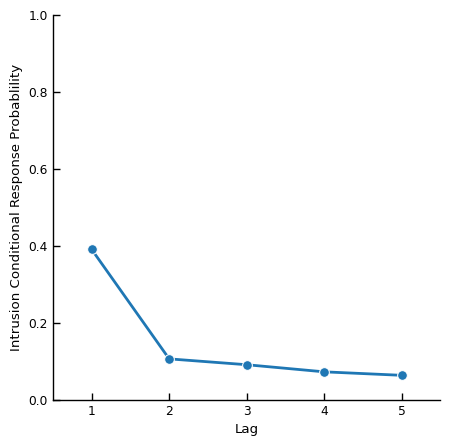

In [501]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_PLIgp.query("list_abs_lag < 6"), x='list_abs_lag', y='PLI_prob', linewidth=2, marker='o', markersize = 7)
plt.ylim([0,1])
plt.xlim([0.5,5.5])
plt.xticks(ticks=np.arange(1,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
plt.savefig('fig/simu7_PLI.pdf')
plt.show()

In [495]:
df_ILI = df_simu.loc[df_simu.intrusion_type == 'ILI']
df_ILI

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
12,1,0,844,1021.0,1760.0,0.659873,LOOP,396,5,1,False,1.0,7.0,0.0,2.0,ILI
20,2,0,1399,570.0,2480.0,0.695454,SUBURB,142,3,1,False,2.0,4.0,0.0,1.0,ILI
25,3,0,621,266.0,1760.0,0.782248,GARAGE,1202,10,1,False,3.0,11.0,0.0,1.0,ILI
26,3,0,1508,734.0,1780.0,0.650107,TROMBONE,1437,2,1,False,3.0,5.0,0.0,3.0,ILI
27,3,0,245,911.0,2150.0,0.732476,CARNIVAL,1410,6,0,False,3.0,5.0,0.0,-1.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63993,15,499,993,175.0,1430.0,0.778229,OWNER,1097,6,1,False,15.0,9.0,0.0,3.0,ILI
63994,15,499,608,755.0,1210.0,0.721838,FROG,374,2,1,False,15.0,7.0,0.0,5.0,ILI
63995,15,499,1297,1261.0,1790.0,0.732678,SHRIMP,1053,3,0,False,15.0,5.0,0.0,2.0,ILI
63997,15,499,1436,1106.0,2060.0,0.704206,TART,488,11,0,False,15.0,5.0,0.0,-6.0,ILI


In [496]:
df_ILI.groupby("list")["pos_lag"].mean()

list
1     0.873094
2     0.719595
3     0.692768
4     0.668093
5     0.802036
6     0.785892
7     0.742629
8     0.749113
9     0.683265
10    0.704004
11    0.826776
12    0.864561
13    0.831449
14    0.863302
15    0.770228
Name: pos_lag, dtype: float64

In [497]:
df_ILIgp = df_ILI.groupby("pos_lag")['test_item'].count().to_frame(name='ILI_cnt').reset_index()
# df_PLIgp['list_abs_lag'] = np.abs(df_PLIgp['list_lag'])
ILI_num = df_ILI.shape[0]
df_ILIgp['ILI_prob'] = df_ILIgp['ILI_cnt'] / ILI_num
df_ILIgp

,pos_lag,ILI_cnt,ILI_prob
0,-11.0,87,0.002931
1,-10.0,221,0.007444
2,-9.0,256,0.008623
3,-8.0,360,0.012127
4,-7.0,500,0.016842
5,-6.0,593,0.019975
6,-5.0,733,0.024691
7,-4.0,1053,0.035470
8,-3.0,1469,0.049483
9,-2.0,2234,0.075252


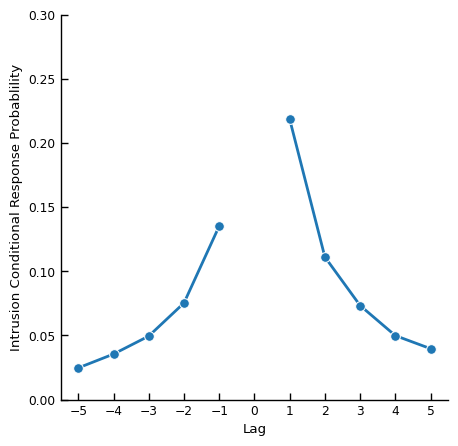

In [502]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

sns.lineplot(data=df_ILIgp.query("-6 < pos_lag < 0"), x='pos_lag', y='ILI_prob', linewidth=2, marker='o', markersize = 7,color='C0')
sns.lineplot(data=df_ILIgp.query("0 < pos_lag < 6"), x='pos_lag', y='ILI_prob', linewidth=2, marker='o', markersize = 7,color='C0')
plt.ylim([0,0.3])
plt.xticks(ticks=np.arange(-5,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
plt.savefig('fig/simu7_ILI.pdf')
plt.show()